In [ ]:
import pandas as pd

# Load the dataset (update the file path if necessary)
file_name = './combined_news_final_sorted.xlsx'  # Replace with the correct file name
data = pd.read_excel(file_name)

# Function to remove text after "Also Read" (case-insensitive)
def remove_after_also_read(text):
    if isinstance(text, str):  # Ensure the cell contains a string
        keyword = "also read"
        lower_text = text.lower()  # Convert to lowercase for case-insensitive matching
        if keyword in lower_text:
            index = lower_text.find(keyword)  # Find the position of "also read"
            return text[:index]  # Keep everything before "also read"
    return text  # Return original value if not a string

# Apply the function to the 'content' column
data['content'] = data['content'].apply(remove_after_also_read)

# Save the modified dataset
output_file = 'cleaned_dataset.xlsx'
data.to_excel(output_file, index=False)

print(f"Processed dataset saved as {output_file}")


In [ ]:
import pandas as pd

# Load the dataset (update the file path if necessary)
file_name = './cleaned_dataset.xlsx'  # Replace with the correct file name
data = pd.read_excel(file_name)

# Function to remove text after "Also Read" (case-insensitive)
def remove_after_also_read(text):
    if isinstance(text, str):  # Ensure the cell contains a string
        # Define keywords to remove text after (can include multiple phrases)
        keywords = ["also read", "artificial intelligence(ai)", 
               "java programming with chatgpt: learn using generative ai"]
        
        # Check for each keyword
        lower_text = text.lower()
        for keyword in keywords:
            if keyword in lower_text:
                index = lower_text.find(keyword)
                text = text[:index]  # Keep everything before the keyword

        lower_text = text.lower()  # Convert to lowercase for case-insensitive matching
        if keyword in lower_text:
            index = lower_text.find(keyword)  # Find the position of "also read"
            return text[:index]  # Keep everything before "also read"
    return text  # Return original value if not a string

# Apply the function to the 'content' column
data['content'] = data['content'].apply(remove_after_also_read)

# Save the modified dataset
output_file = 'cleaned_dataset.xlsx'
data.to_excel(output_file, index=False)

print(f"Processed dataset saved as {output_file}")


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from collections import Counter
import spacy
from wordcloud import WordCloud
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Set plotting style
plt.style.use('ggplot')
sns.set(style="whitegrid")

# Download required NLTK resources
!pip install pandas nltk spacy wordcloud plotly
!python -m nltk.downloader stopwords punkt
!python -m spacy download en_core_web_sm

print("Setup complete!")

<frozen runpy>:128: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 59.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
Setup complete!


In [3]:
# Load the news articles dataset
df = pd.read_csv("filtered_articles.csv")

# Display basic information about the dataset
print(f"Dataset shape: {df.shape}")
print("\nDataset columns:")
print(df.columns.tolist())

print("\nSample headlines:")
print(df['headline'].head())

print("\nBasic statistics:")
print(df.describe(include='all'))

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing values per column:")
print(missing_values)


Dataset shape: (1583, 5)

Dataset columns:
['headline', 'date', 'content', 'headline_entities', 'content_entities']

Sample headlines:
0    Bajaj Hindusthan Sugar close to default: Care ...
1    Adani, Aditya Birla groups to compete in wire ...
2    IndusInd International assumes control of Reli...
3    Reliance-backed GTPL Hathway signs agreement w...
4    Amid instabilitÃ©, India looks more predictabl...
Name: headline, dtype: object

Basic statistics:
                                                 headline        date  \
count                                                1583        1583   
unique                                               1578         593   
top     Reliance & SBI Card tie-up to launch lifestyle...  29-08-2024   
freq                                                    2          23   

                                                  content headline_entities  \
count                                                1568              1580   
unique           

Text length statistics:
        text_length   word_count
count   1583.000000  1583.000000
mean    5050.766898   786.408718
std     2828.877830   445.266708
min       87.000000    11.000000
25%     2976.500000   471.500000
50%     5032.000000   780.000000
75%     6423.500000   994.500000
max    32489.000000  5538.000000


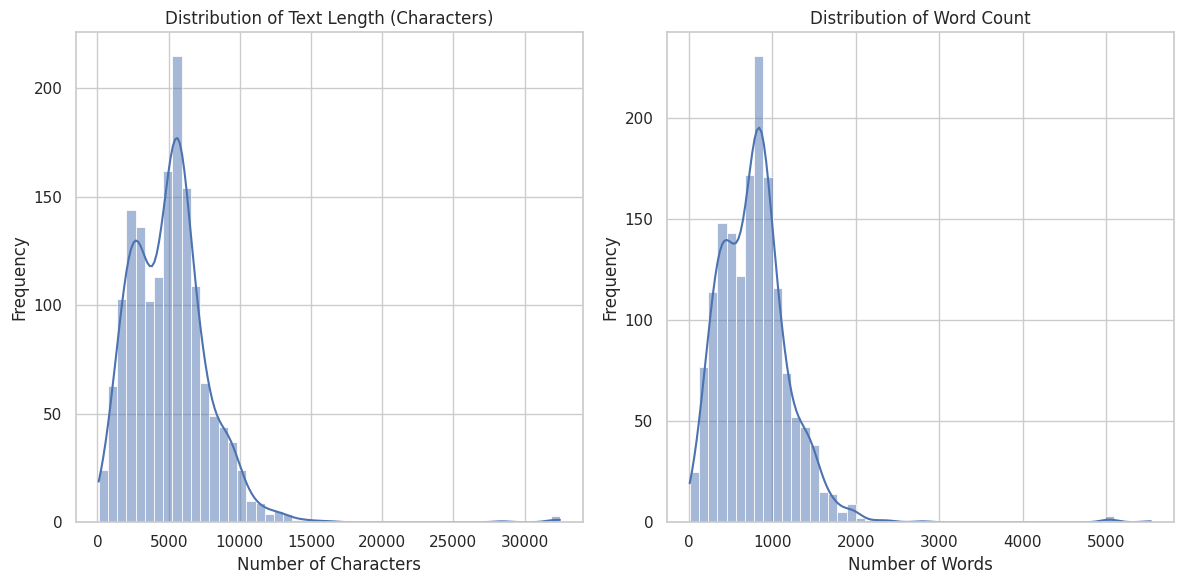

In [4]:
# Fill NaN values with empty strings
df['headline'] = df['headline'].fillna('')
df['content'] = df['content'].fillna('')

# Combine headline and content into a single text field
df['text'] = df['headline'] + " " + df['content']

# Display text length statistics
df['text_length'] = df['text'].apply(len)
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

print("Text length statistics:")
print(df[['text_length', 'word_count']].describe())

# Plot text length distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title('Distribution of Text Length (Characters)')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df['word_count'], bins=50, kde=True)
plt.title('Distribution of Word Count')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


Sample Headline: Future Retail Limited seeks access to stores, warehouses
Sample Text Length: 2519 characters, 397 words

First 500 characters of the sample text:
Future Retail Limited seeks access to stores, warehouses Future Retail
has filed an application before the National Company Law Tribunal, Mumbai, seeking directions to gain access to the inaccessible stores and warehouses of FRL, and connected consequential reliefs, it said in a stock exchange filing.
The company's resolution professional also requested the bankruptcy court to exclude 90 days from the company's corporate
insolvency
resolution process (
CIRP
) period.
The RP of promoter Kishore B...


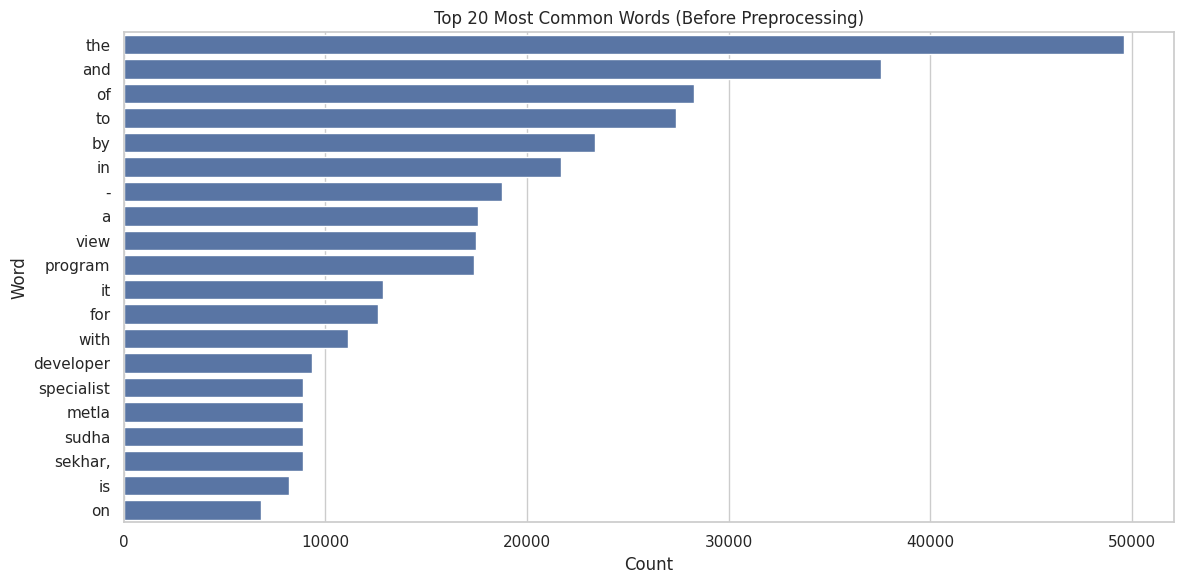

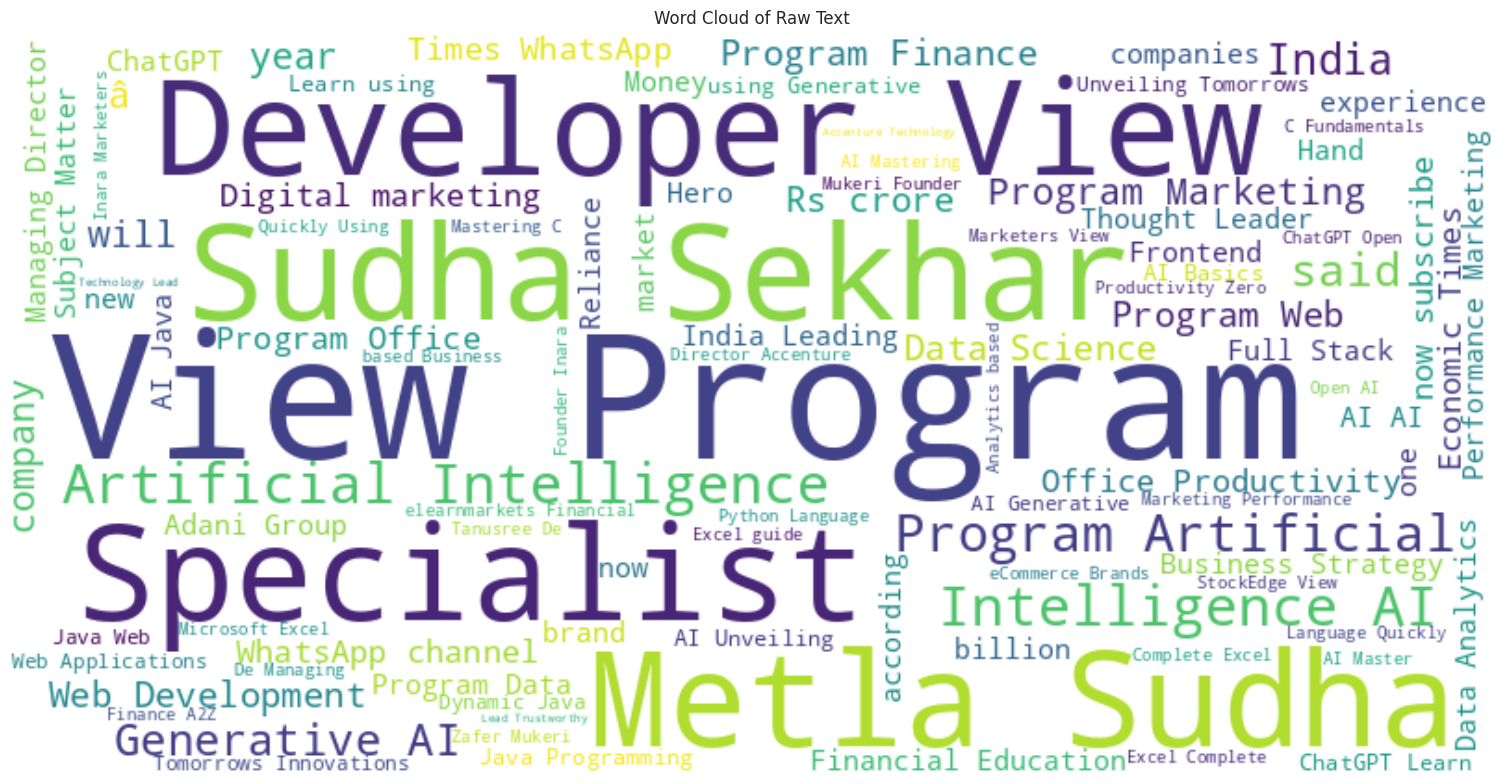

In [5]:
# Sample a random article for demonstration
sample_idx = np.random.randint(0, len(df))
sample_text = df.iloc[sample_idx]['text']
sample_headline = df.iloc[sample_idx]['headline']

print(f"Sample Headline: {sample_headline}")
print(f"Sample Text Length: {len(sample_text)} characters, {len(sample_text.split())} words")
print("\nFirst 500 characters of the sample text:")
print(sample_text[:500] + "...")

# Extract most common words (pre-processing)
words = ' '.join(df['text']).lower().split()
word_counts = Counter(words)
most_common_words = pd.DataFrame(word_counts.most_common(20), columns=['word', 'count'])

plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='word', data=most_common_words)
plt.title('Top 20 Most Common Words (Before Preprocessing)')
plt.xlabel('Count')
plt.ylabel('Word')
plt.tight_layout()
plt.show()

# Create a word cloud from raw text
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(' '.join(df['text']))
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Raw Text')
plt.tight_layout()
plt.show()


In [6]:
# Load spacy model
nlp = spacy.load("en_core_web_sm")

# English stopwords from nltk
stop_words = set(stopwords.words('english'))

# Function to preprocess text with detailed steps
def detailed_preprocess(text):
    """
    Returns a dictionary with text after each preprocessing step
    """
    results = {
        'original': text,
        'lowercase': None,
        'removed_punctuation': None,
        'removed_stopwords': None,
        'lemmatized': None
    }

    # 1. Lowercase
    results['lowercase'] = text.lower()

    # 2. Remove punctuation and numbers
    results['removed_punctuation'] = re.sub(r'[^a-z\s]', '', results['lowercase'])

    # 3. Tokenize, remove stopwords and short words
    doc = nlp(results['removed_punctuation'])

    # Stopwords removal
    no_stopwords = [token.text for token in doc if token.text not in stop_words and len(token.text) > 2 and token.is_alpha]
    results['removed_stopwords'] = ' '.join(no_stopwords)

    # Lemmatization
    lemmatized = [token.lemma_ for token in nlp(results['removed_stopwords'])]
    results['lemmatized'] = ' '.join(lemmatized)

    return results

# Final preprocessing function
def preprocess_text(text):
    """
    Apply all preprocessing steps and return final processed text
    """
    # 1. Lowercase
    text = text.lower()

    # 2. Remove punctuation and numbers
    text = re.sub(r'[^a-z\s]', '', text)

    # 3. Tokenize, remove stopwords, short words, and lemmatize
    doc = nlp(text)
    tokens = [
        token.lemma_ for token in doc
        if token.lemma_ not in stop_words and len(token.lemma_) > 2 and token.is_alpha
    ]

    # 4. Join tokens back to a single string
    return " ".join(tokens)


In [7]:
# Apply detailed preprocessing to sample text
preprocessing_steps = detailed_preprocess(sample_text)

# Print each step
for step, text in preprocessing_steps.items():
    print(f"\n--- {step.upper()} ---")
    display_text = text[:500] + "..." if text and len(text) > 500 else text
    print(display_text)
    if text:
        print(f"Character count: {len(text)}, Word count: {len(text.split())}")



--- ORIGINAL ---
Future Retail Limited seeks access to stores, warehouses Future Retail
has filed an application before the National Company Law Tribunal, Mumbai, seeking directions to gain access to the inaccessible stores and warehouses of FRL, and connected consequential reliefs, it said in a stock exchange filing.
The company's resolution professional also requested the bankruptcy court to exclude 90 days from the company's corporate
insolvency
resolution process (
CIRP
) period.
The RP of promoter Kishore B...
Character count: 2519, Word count: 397

--- LOWERCASE ---
future retail limited seeks access to stores, warehouses future retail
has filed an application before the national company law tribunal, mumbai, seeking directions to gain access to the inaccessible stores and warehouses of frl, and connected consequential reliefs, it said in a stock exchange filing.
the company's resolution professional also requested the bankruptcy court to exclude 90 days from the company's corpo

In [ ]:
# Calculate statistics for each preprocessing step on the sample
step_stats = []
for step, text in preprocessing_steps.items():
    if text:
        words = text.split()
        step_stats.append({
            'step': step,
            'character_count': len(text),
            'word_count': len(words),
            'unique_word_count': len(set(words))
        })

step_df = pd.DataFrame(step_stats)

# Plot the statistics
fig = make_subplots(rows=1, cols=3,
                    subplot_titles=('Character Count', 'Word Count', 'Unique Word Count'))

metrics = ['character_count', 'word_count', 'unique_word_count']
for i, metric in enumerate(metrics):
    fig.add_trace(
        go.Bar(x=step_df['step'], y=step_df[metric], name=metric),
        row=1, col=i+1
    )

fig.update_layout(height=500, width=1200, title_text="Impact of Each Preprocessing Step")
fig.show()

Applying preprocessing to all articles...
Preprocessing complete!

Sample of processed text:
future retail limited seek access store warehouse future retail file application national company law tribunal mumbai seek direction gain access inaccessible store warehouse frl connected consequential relief say stock exchange filing company resolution professional also request bankruptcy court exclude day company corporate insolvency resolution process cirp period promoter kishore biyanis defunct retailer approach mumbai bench national company law tribunal nclt extend timeline revival process ...


<Figure size 1400x1000 with 0 Axes>

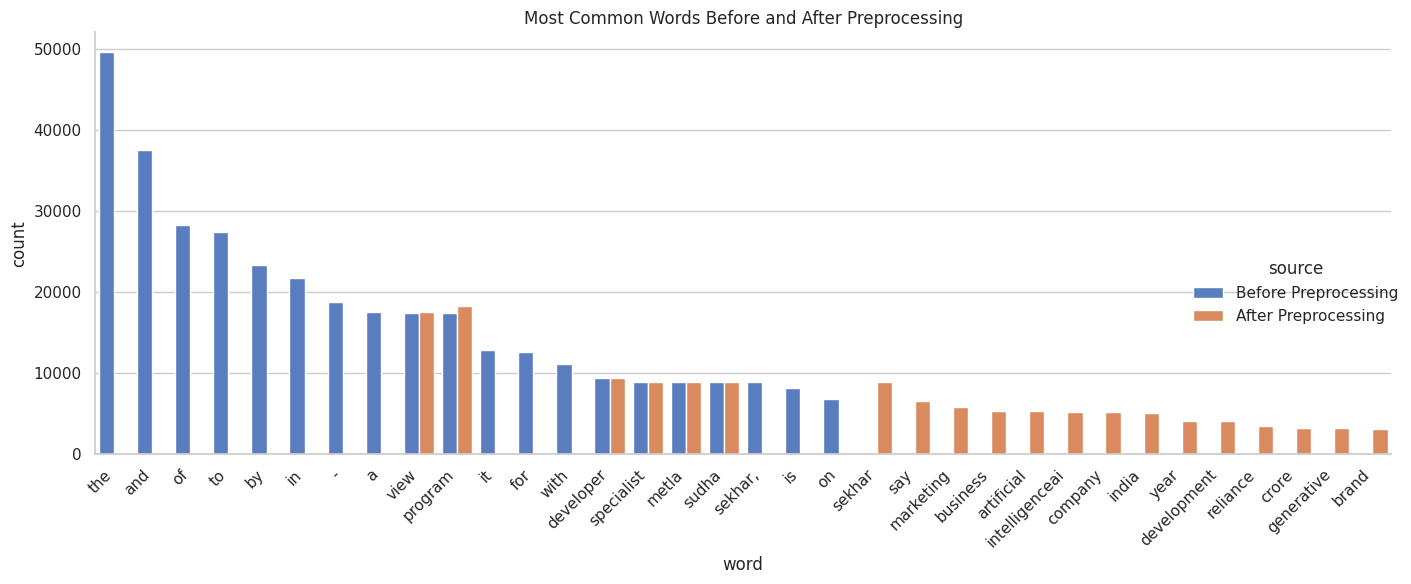

In [9]:
# Before preprocessing
raw_word_freq = Counter(' '.join(df['text']).lower().split())
common_raw = pd.DataFrame(raw_word_freq.most_common(20), columns=['word', 'count'])
common_raw['source'] = 'Before Preprocessing'

# Preview and apply preprocessing to all articles
print("Applying preprocessing to all articles...")
df['processed_text'] = df['text'].apply(preprocess_text)
print("Preprocessing complete!")

# Sample of processed text
print("\nSample of processed text:")
print(df['processed_text'].iloc[sample_idx][:500] + "...")

# After preprocessing
processed_word_freq = Counter(' '.join(df['processed_text']).split())
common_processed = pd.DataFrame(processed_word_freq.most_common(20), columns=['word', 'count'])
common_processed['source'] = 'After Preprocessing'

# Combine for comparison
all_common = pd.concat([common_raw, common_processed])

# Compare word frequencies
plt.figure(figsize=(14, 10))
g = sns.catplot(
    data=all_common, kind="bar",
    x="word", y="count", hue="source",
    height=6, aspect=2, palette="muted"
)
g.set_xticklabels(rotation=45, ha="right")
plt.title('Most Common Words Before and After Preprocessing')
plt.tight_layout()
plt.show()


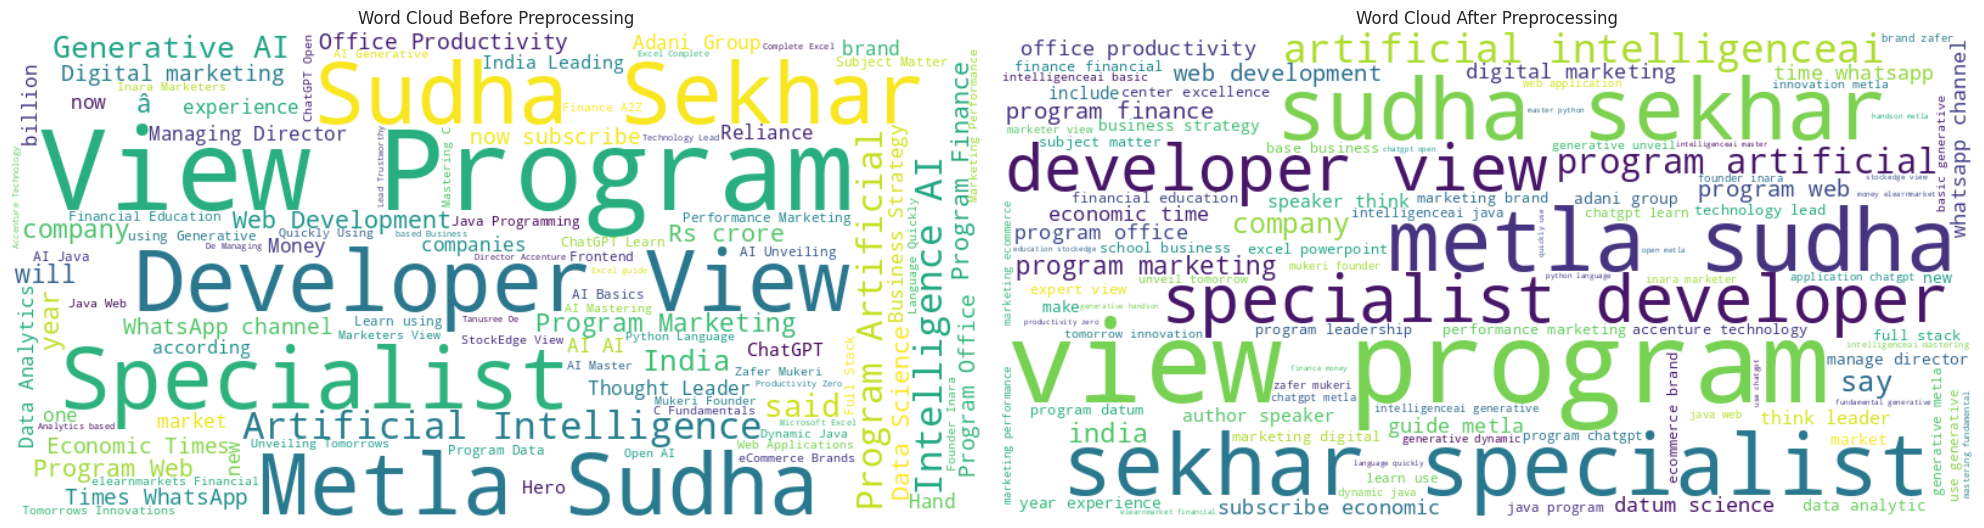

In [13]:
plt.figure(figsize=(20, 10))

# Before preprocessing
plt.subplot(1, 2, 1)
wordcloud_raw = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(' '.join(df['text']))
plt.imshow(wordcloud_raw, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Before Preprocessing')

# After preprocessing
plt.subplot(1, 2, 2)
wordcloud_processed = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(' '.join(df['processed_text']))
plt.imshow(wordcloud_processed, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud After Preprocessing')

plt.tight_layout()
plt.show()


Text Reduction Statistics:
       char_reduction_pct  word_reduction_pct
count         1583.000000         1583.000000
mean            27.745982           38.182742
std              4.426975            4.179122
min             11.111111           12.500000
25%             24.266360           35.254989
50%             27.184857           37.654321
75%             31.009251           40.714187
max             45.446476           54.625122


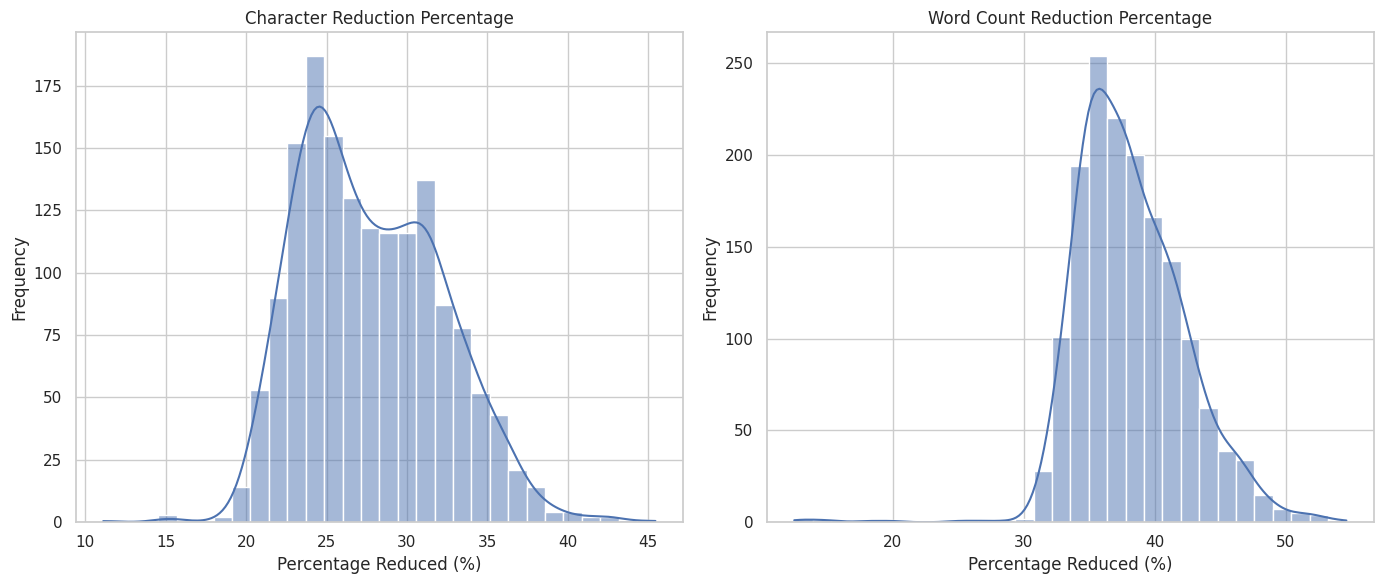

In [14]:
df['processed_length'] = df['processed_text'].apply(len)
df['processed_word_count'] = df['processed_text'].apply(lambda x: len(x.split()))

# Calculate reduction statistics
df['char_reduction_pct'] = (1 - df['processed_length'] / df['text_length']) * 100
df['word_reduction_pct'] = (1 - df['processed_word_count'] / df['word_count']) * 100

# Display reduction statistics
print("Text Reduction Statistics:")
print(df[['char_reduction_pct', 'word_reduction_pct']].describe())

# Plot reduction
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['char_reduction_pct'], bins=30, kde=True)
plt.title('Character Reduction Percentage')
plt.xlabel('Percentage Reduced (%)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df['word_reduction_pct'], bins=30, kde=True)
plt.title('Word Count Reduction Percentage')
plt.xlabel('Percentage Reduced (%)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


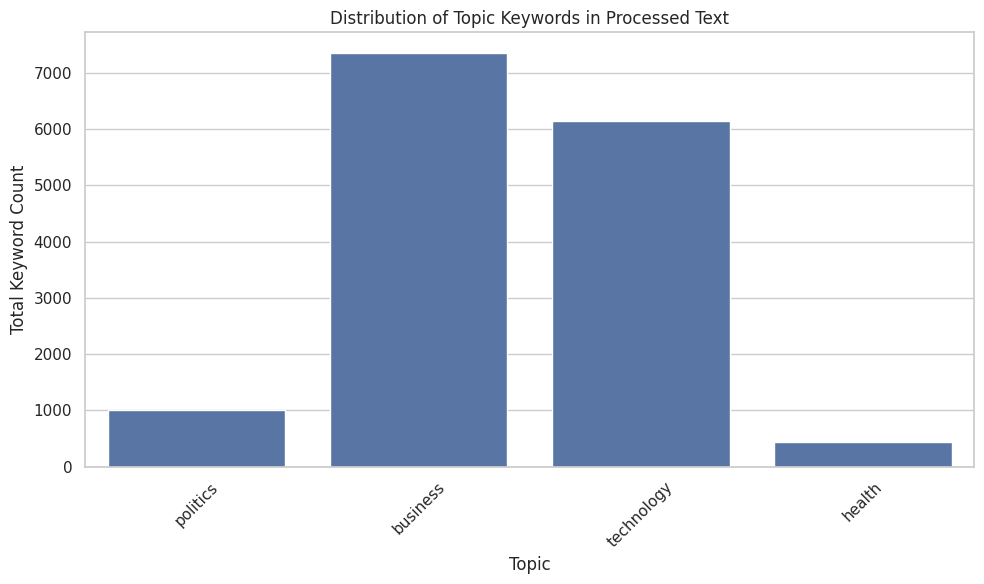

In [11]:
# Simple topic keywords (can be expanded based on domain knowledge)
topics = {
    'politics': ['government', 'president', 'election', 'policy', 'vote', 'campaign', 'political', 'congress', 'democrat', 'republican'],
    'business': ['market', 'company', 'stock', 'economy', 'business', 'industry', 'financial', 'trade', 'investor', 'dollar'],
    'technology': ['technology', 'digital', 'software', 'internet', 'device', 'app', 'data', 'tech', 'computer', 'online'],
    'health': ['health', 'medical', 'doctor', 'patient', 'disease', 'hospital', 'drug', 'treatment', 'research', 'vaccine']
}

# Function to check if text contains topic keywords
def classify_topic(text, topic_dict):
    text_lower = text.lower()
    topic_counts = {}

    for topic, keywords in topic_dict.items():
        count = sum(1 for keyword in keywords if keyword in text_lower)
        topic_counts[topic] = count

    return topic_counts

# Apply topic classification
topic_results = df['processed_text'].apply(lambda x: classify_topic(x, topics))
topic_df = pd.DataFrame(topic_results.tolist())

# Add topic counts to main dataframe
for topic in topics:
    df[f'topic_{topic}'] = topic_df[topic]

# Calculate overall topic distribution
topic_totals = {topic: df[f'topic_{topic}'].sum() for topic in topics}
topic_dist = pd.DataFrame(list(topic_totals.items()), columns=['Topic', 'Keyword Count'])

# Plot topic distribution
plt.figure(figsize=(10, 6))
sns.barplot(x='Topic', y='Keyword Count', data=topic_dist)
plt.title('Distribution of Topic Keywords in Processed Text')
plt.xlabel('Topic')
plt.ylabel('Total Keyword Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [15]:
# Save the preprocessed dataframe
df.to_csv("preprocessed_news_data.csv", index=False)
print("Preprocessed data saved to 'preprocessed_news_data.csv'")

# Summary of preprocessing results
print("\nPreprocessing Summary:")
print(f"Original dataset: {df.shape[0]} articles")
print(f"Average original text length: {df['text_length'].mean():.2f} characters")
print(f"Average processed text length: {df['processed_length'].mean():.2f} characters")
print(f"Average character reduction: {df['char_reduction_pct'].mean():.2f}%")
print(f"Average word reduction: {df['word_reduction_pct'].mean():.2f}%")
print(f"Total unique words before preprocessing: {len(raw_word_freq):,}")
print(f"Total unique words after preprocessing: {len(processed_word_freq):,}")
print(f"Vocabulary reduction: {(1 - len(processed_word_freq)/len(raw_word_freq))*100:.2f}%")

Preprocessed data saved to 'preprocessed_news_data.csv'

Preprocessing Summary:
Original dataset: 1583 articles
Average original text length: 5050.77 characters
Average processed text length: 3672.14 characters
Average character reduction: 27.75%
Average word reduction: 38.18%
Total unique words before preprocessing: 56,083
Total unique words after preprocessing: 22,077
Vocabulary reduction: 60.64%
